In [10]:
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
from statsmodels.tsa.stattools import coint
import seaborn
import math as math
import yfinance as yf

In [11]:
TRADING_INSTRUMENT = 'CADUSD=X'
SYMBOLS = 'AUDUSD=X GBPUSD=X CADUSD=X CHFUSD=X EURUSD=X JPYUSD=X NZDUSD=X'
SYMBOLS1 = ['AUDUSD=X', 'GBPUSD=X', 'CADUSD=X', 'CHFUSD=X', 'EURUSD=X', 'JPYUSD=X', 'NZDUSD=X']
data = yf.download(SYMBOLS, start="2014-01-01", end="2018-01-01")
data

[*********************100%***********************]  7 of 7 completed


Adj Close                                                    \
            AUDUSD=X  CADUSD=X  CHFUSD=X  EURUSD=X  GBPUSD=X  JPYUSD=X   
Date                                                                     
2013-12-31  0.891981  0.939408  1.127142  1.381006  1.649512  0.009530   
2014-01-01  0.891504  0.941682  1.120210  1.374495  1.656397  0.009497   
2014-01-02  0.889205  0.939452  1.121705  1.376671  1.658072  0.009495   
2014-01-03  0.890631  0.937286  1.112174  1.366662  1.644791  0.009539   
2014-01-06  0.896539  0.940690  1.104936  1.359601  1.641309  0.009532   
...              ...       ...       ...       ...       ...       ...   
2017-12-25  0.771486  0.785793  1.011041  1.185607  1.336505  0.008826   
2017-12-26  0.772559  0.786442  1.011225  1.187254  1.337614  0.008826   
2017-12-27  0.773043  0.788208  1.010407  1.185789  1.337471  0.008834   
2017-12-28  0.777484  0.790533  1.014405  1.190079  1.340393  0.008833   
2017-12-29  0.779429  0.795830  1.021764  1.194172  1.344086  0.008859   

                         Close                      ...      Open            \
            NZDUSD=X  AUDUSD=X  CADUSD=X  CHFUSD=X  ...  GBPUSD=X  JPYUSD=X   
Date                                                ...                       
2013-12-31  0.821760  0.891981  0.939408  1.127142  ...  1.649158  0.009531   
2014-01-01  0.822707  0.891504  0.941682  1.120210  ...  1.656397  0.009497   
2014-01-02  0.820883  0.889205  0.939452  1.121705  ...  1.657660  0.009495   
2014-01-03  0.818733  0.890631  0.937286  1.112174  ...  1.645007  0.009540   
2014-01-06  0.826720  0.896539  0.940690  1.104936  ...  1.641201  0.009533   
...              ...       ...       ...       ...  ...       ...       ...   
2017-12-25  0.701508  0.771486  0.785793  1.011041  ...  1.336720  0.008827   
2017-12-26  0.702800  0.772559  0.786442  1.011225  ...  1.337489  0.008825   
2017-12-27  0.703250  0.773043  0.788208  1.010407  ...  1.337381  0.008834   
2017-12-28  0.706969  0.777484  0.790533  1.014405  ...  1.340267  0.008832   
2017-12-29  0.709341  0.779429  0.795830  1.021764  ...  1.344267  0.008859   

                       Volume                                               \
            NZDUSD=X AUDUSD=X CADUSD=X CHFUSD=X EURUSD=X GBPUSD=X JPYUSD=X   
Date                                                                         
2013-12-31  0.821963        0        0        0        0        0        0   
2014-01-01  0.822707        0        0        0        0        0        0   
2014-01-02  0.820681        0        0        0        0        0        0   
2014-01-03  0.818666        0        0        0        0        0        0   
2014-01-06  0.826788        0        0        0        0        0        0   
...              ...      ...      ...      ...      ...      ...      ...   
2017-12-25  0.701508        0        0        0        0        0        0   
2017-12-26  0.702681        0        0        0        0        0        0   
2017-12-27  0.703260        0        0        0        0        0        0   
2017-12-28  0.706999        0        0        0        0        0        0   
2017-12-29  0.709341        0        0        0        0        0        0   

                     
           NZDUSD=X  
Date                 
2013-12-31        0  
2014-01-01        0  
2014-01-02        0  
2014-01-03        0  
2014-01-06        0  
...             ...  
2017-12-25        0  
2017-12-26        0  
2017-12-27        0  
2017-12-28        0  
2017-12-29        0  

[1042 rows x 42 columns]

<ipython-input-12-b4ffc487015f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data['JPYUSD=X'] =  price_data['JPYUSD=X']*100 # visualiation purposes


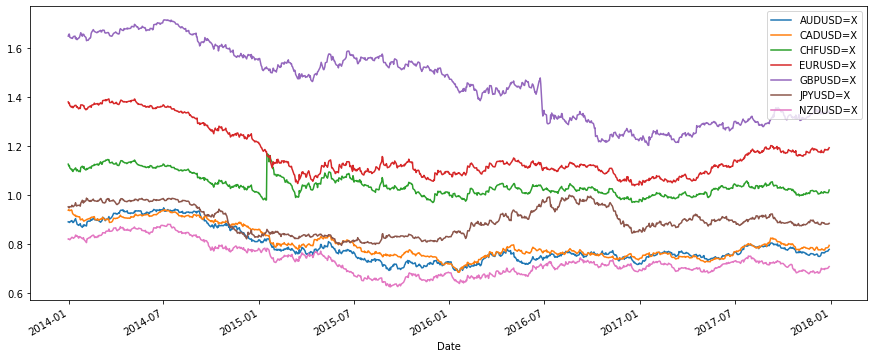

In [12]:
price_data = pd.DataFrame()
price_data = data['Close']
price_data['JPYUSD=X'] =  price_data['JPYUSD=X']*100 # visualiation purposes
price_data
price_data.plot(figsize = (15,6))


In [18]:
symbols_data = {}
for symbol in SYMBOLS1:
    data = yf.download(symbol, start="2014-01-01", end="2018-01-01")
    symbols_data[symbol] = data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [19]:
symbols_data

{'AUDUSD=X':                 Open      High       Low     Close  Adj Close  Volume
 Date                                                                 
 2013-12-31  0.892538  0.895415  0.891266  0.891981   0.891981       0
 2014-01-01  0.891504  0.892538  0.891504  0.891504   0.891504       0
 2014-01-02  0.889284  0.894135  0.884486  0.889205   0.889205       0
 2014-01-03  0.890710  0.900495  0.888731  0.890631   0.890631       0
 2014-01-06  0.896539  0.898311  0.893655  0.896539   0.896539       0
 ...              ...       ...       ...       ...        ...     ...
 2017-12-25  0.771605  0.775855  0.771188  0.771486   0.771486       0
 2017-12-26  0.772499  0.772798  0.771367  0.772559   0.772559       0
 2017-12-27  0.773048  0.777605  0.773036  0.773043   0.773043       0
 2017-12-28  0.777544  0.781128  0.777484  0.777484   0.777484       0
 2017-12-29  0.779484  0.782595  0.778998  0.779429   0.779429       0
 
 [1042 rows x 6 columns],
 'GBPUSD=X':                 Open    

In [20]:
SMA_NUM_PERIODS = 20  # look back period
price_history = {}  # history of prices

PRICE_DEV_NUM_PRICES = 200 # look back period of ClosePrice deviations from SMA
price_deviation_from_sma = {}  # history of ClosePrice deviations from SMA

# We will use this to iterate over all the days of data we have
num_days = len(symbols_data[TRADING_INSTRUMENT].index)
correlation_history = {} # history of correlations per currency pair
delta_projected_actual_history = {} # history of differences between Projected ClosePrice deviation and actual ClosePrice deviation per currency pair

final_delta_projected_history = [] # history of differences between final Projected ClosePrice deviation for TRADING_INSTRUMENT and actual ClosePrice deviation

# Variables for Trading Strategy trade, position & pnl management:
orders = []  # Container for tracking buy/sell order, +1 for buy order, -1 for sell order, 0 for no-action
positions = []  # Container for tracking positions, +ve for long positions, -ve for short positions, 0 for flat/no position
pnls = []  # Container for tracking total_pnls, this is the sum of closed_pnl i.e. pnls already locked in and open_pnl i.e. pnls for open-position marked to market price

last_buy_price = 0  # Price at which last buy trade was made, used to prevent over-trading at/around the same price
last_sell_price = 0  # Price at which last sell trade was made, used to prevent over-trading at/around the same price
position = 0  # Current position of the trading strategy
buy_sum_price_qty = 0  # Summation of products of buy_trade_price and buy_trade_qty for every buy Trade made since last time being flat
buy_sum_qty = 0  # Summation of buy_trade_qty for every buy Trade made since last time being flat
sell_sum_price_qty = 0  # Summation of products of sell_trade_price and sell_trade_qty for every sell Trade made since last time being flat
sell_sum_qty = 0  # Summation of sell_trade_qty for every sell Trade made since last time being flat
open_pnl = 0  # Open/Unrealized PnL marked to market
closed_pnl = 0  # Closed/Realized PnL so far

# Constants that define strategy behavior/thresholds
StatArb_VALUE_FOR_BUY_ENTRY = 0.01  # StatArb trading signal value aboe which to enter buy-orders/long-position
StatArb_VALUE_FOR_SELL_ENTRY = -0.01  # StatArb trading signal value below which to enter sell-orders/short-position
MIN_PRICE_MOVE_FROM_LAST_TRADE = 0.01  # Minimum price change since last trade before considering trading again, this is to prevent over-trading at/around same prices
NUM_SHARES_PER_TRADE = 1000000  # Number of currency to buy/sell on every trade
MIN_PROFIT_TO_CLOSE = 10  # Minimum Open/Unrealized profit at which to close positions and lock profits

In [21]:
num_days

1042

In [46]:
for i in range(0, num_days):
  close_prices = {}

  # Build ClosePrice series, compute SMA for each symbol and price-deviation from SMA for each symbol
  for symbol in SYMBOLS1:
    close_prices[symbol] = symbols_data[symbol]['Close'].iloc[i]
    if not symbol in price_history.keys():
      price_history[symbol] = []
      price_deviation_from_sma[symbol] = []

    price_history[symbol].append(close_prices[symbol])
    if len(price_history[symbol]) > SMA_NUM_PERIODS:  # we track at most SMA_NUM_PERIODS number of prices
      del (price_history[symbol][0])

    sma = stats.mean(price_history[symbol]) # Rolling SimpleMovingAverage
    price_deviation_from_sma[symbol].append(close_prices[symbol] - sma) # price deviation from mean
    if len(price_deviation_from_sma[symbol]) > PRICE_DEV_NUM_PRICES:
      del (price_deviation_from_sma[symbol][0])

  # Now compute covariance and correlation between TRADING_INSTRUMENT and every other lead symbol
  # also compute projected price deviation and find delta between projected and actual price deviations.
  projected_dev_from_sma_using = {}
  for symbol in SYMBOLS1:
    if symbol == TRADING_INSTRUMENT:  # no need to find relationship between trading instrument and itself
      continue

    correlation_label = TRADING_INSTRUMENT + '<-' + symbol
    if correlation_label not in correlation_history.keys(): # first entry for this pair in the history dictionary
      correlation_history[correlation_label] = []
      delta_projected_actual_history[correlation_label] = []

    if len(price_deviation_from_sma[symbol]) < 2: # need atleast two observations to compute covariance/correlation
      correlation_history[correlation_label].append(0)
      delta_projected_actual_history[correlation_label].append(0)
      continue

    corr = np.corrcoef(price_deviation_from_sma[TRADING_INSTRUMENT], price_deviation_from_sma[symbol])
    cov = np.cov(price_deviation_from_sma[TRADING_INSTRUMENT], price_deviation_from_sma[symbol])
    corr_trading_instrument_lead_instrument = corr[0, 1]  # get the correlation between the 2 series
    cov_trading_instrument_lead_instrument = cov[0, 0] / cov[0, 1] # get the covariance between the 2 series

    correlation_history[correlation_label].append(corr_trading_instrument_lead_instrument)

    # projected-price-deviation-in-TRADING_INSTRUMENT is covariance * price-deviation-in-lead-symbol
    projected_dev_from_sma_using[symbol] = price_deviation_from_sma[symbol][-1] * cov_trading_instrument_lead_instrument

    # delta +ve => signal says TRADING_INSTRUMENT price should have moved up more than what it did
    # delta -ve => signal says TRADING_INSTRUMENT price should have moved down more than what it did.
    delta_projected_actual = (projected_dev_from_sma_using[symbol] - price_deviation_from_sma[TRADING_INSTRUMENT][-1])
    delta_projected_actual_history[correlation_label].append(delta_projected_actual)

  # weigh predictions from each pair, weight is the correlation between those pairs
  sum_weights = 0 # sum of weights is sum of correlations for each symbol with TRADING_INSTRUMENT
  for symbol in SYMBOLS1:
    if symbol == TRADING_INSTRUMENT:  # no need to find relationship between trading instrument and itself
      continue

    correlation_label = TRADING_INSTRUMENT + '<-' + symbol
    sum_weights += abs(correlation_history[correlation_label][-1])

  final_delta_projected = 0 # will hold final prediction of price deviation in TRADING_INSTRUMENT, weighing projections from all other symbols.
  close_price = close_prices[TRADING_INSTRUMENT]
  for symbol in SYMBOLS1:
    if symbol == TRADING_INSTRUMENT:  # no need to find relationship between trading instrument and itself
      continue

    correlation_label = TRADING_INSTRUMENT + '<-' + symbol

    # weight projection from a symbol by correlation
    final_delta_projected += (abs(correlation_history[correlation_label][-1]) * delta_projected_actual_history[correlation_label][-1])

  # normalize by diving by sum of weights for all pairs
  if sum_weights != 0:
    final_delta_projected /= sum_weights
  else:
    final_delta_projected = 0

  final_delta_projected_history.append(final_delta_projected)

  # This section checks trading signal against trading parameters/thresholds and positions, to trade.
  #
  # We will perform a sell trade at close_prices if the following conditions are met:
  # 1. The StatArb trading signal value is below Sell-Entry threshold and the difference between last trade-price and current-price is different enough.
  # 2. We are long( +ve position ) and current position is profitable enough to lock profit.
  if ((final_delta_projected < StatArb_VALUE_FOR_SELL_ENTRY and abs(close_price - last_sell_price) > MIN_PRICE_MOVE_FROM_LAST_TRADE)  # StatArb above sell entry threshold, we should sell
      or
      (position > 0 and (open_pnl > MIN_PROFIT_TO_CLOSE))):  # long from -ve StatArb and StatArb has gone positive or position is profitable, sell to close position
    orders.append(-1)  # mark the sell trade
    last_sell_price = close_price
    position -= NUM_SHARES_PER_TRADE  # reduce position by the size of this trade
    sell_sum_price_qty += (close_price * NUM_SHARES_PER_TRADE)  # update vwap sell-price
    sell_sum_qty += NUM_SHARES_PER_TRADE
    print("Sell ", NUM_SHARES_PER_TRADE, " @ ", close_price, "Position: ", position)
    print("OpenPnL: ", open_pnl, " ClosedPnL: ", closed_pnl, " TotalPnL: ", (open_pnl + closed_pnl))

  # We will perform a buy trade at close_prices if the following conditions are met:
  # 1. The StatArb trading signal value is above Buy-Entry threshold and the difference between last trade-price and current-price is different enough.
  # 2. We are short( -ve position ) and current position is profitable enough to lock profit.
  elif ((final_delta_projected > StatArb_VALUE_FOR_BUY_ENTRY and abs(close_price - last_buy_price) > MIN_PRICE_MOVE_FROM_LAST_TRADE)  # StatArb below buy entry threshold, we should buy
        or
        (position < 0 and (open_pnl > MIN_PROFIT_TO_CLOSE))):  # short from +ve StatArb and StatArb has gone negative or position is profitable, buy to close position
    orders.append(+1)  # mark the buy trade
    last_buy_price = close_price
    position += NUM_SHARES_PER_TRADE  # increase position by the size of this trade
    buy_sum_price_qty += (close_price * NUM_SHARES_PER_TRADE)  # update the vwap buy-price
    buy_sum_qty += NUM_SHARES_PER_TRADE
    print("Buy ", NUM_SHARES_PER_TRADE, " @ ", close_price, "Position: ", position)
    print("OpenPnL: ", open_pnl, " ClosedPnL: ", closed_pnl, " TotalPnL: ", (open_pnl + closed_pnl))
  else:
    # No trade since none of the conditions were met to buy or sell
    orders.append(0)

  positions.append(position)

  # This section updates Open/Unrealized & Closed/Realized positions
  open_pnl = 0
  if position > 0:
    if sell_sum_qty > 0:  # long position and some sell trades have been made against it, close that amount based on how much was sold against this long position
      open_pnl = abs(sell_sum_qty) * (sell_sum_price_qty / sell_sum_qty - buy_sum_price_qty / buy_sum_qty)
    # mark the remaining position to market i.e. pnl would be what it would be if we closed at current price
    open_pnl += abs(sell_sum_qty - position) * (close_price - buy_sum_price_qty / buy_sum_qty)
  elif position < 0:
    if buy_sum_qty > 0:  # short position and some buy trades have been made against it, close that amount based on how much was bought against this short position
      open_pnl = abs(buy_sum_qty) * (sell_sum_price_qty / sell_sum_qty - buy_sum_price_qty / buy_sum_qty)
    # mark the remaining position to market i.e. pnl would be what it would be if we closed at current price
    open_pnl += abs(buy_sum_qty - position) * (sell_sum_price_qty / sell_sum_qty - close_price)
  else:
    # flat, so update closed_pnl and reset tracking variables for positions & pnls
    closed_pnl += (sell_sum_price_qty - buy_sum_price_qty)
    buy_sum_price_qty = 0
    buy_sum_qty = 0
    sell_sum_price_qty = 0
    sell_sum_qty = 0
    last_buy_price = 0
    last_sell_price = 0

  pnls.append(closed_pnl + open_pnl)

Buy  1000000  @  0.9394081830978394 Position:  1000000
OpenPnL:  0  ClosedPnL:  0  TotalPnL:  0
Sell  1000000  @  0.9394522905349731 Position:  0
OpenPnL:  2273.4999656677246  ClosedPnL:  0  TotalPnL:  2273.4999656677246
Buy  1000000  @  0.9240180253982544 Position:  1000000
OpenPnL:  0  ClosedPnL:  44.10743713378906  TotalPnL:  44.10743713378906
Buy  1000000  @  0.9134755730628967 Position:  2000000
OpenPnL:  -5069.255828857422  ClosedPnL:  44.10743713378906  TotalPnL:  -5025.148391723633
Buy  1000000  @  0.9007385969161987 Position:  3000000
OpenPnL:  -14007.031917572021  ClosedPnL:  44.10743713378906  TotalPnL:  -13962.924480438232
Sell  1000000  @  0.9033423662185669 Position:  2000000
OpenPnL:  1143.634319305309  ClosedPnL:  44.10743713378906  TotalPnL:  1187.741756439098
Buy  1000000  @  0.8892446160316467 Position:  3000000
OpenPnL:  -23495.53505579638  ClosedPnL:  44.10743713378906  TotalPnL:  -23451.42761866259
Sell  1000000  @  0.9111201763153076 Position:  2000000
OpenPnL:  

Sell  1000000  @  0.8232553601264954 Position:  -3000000
OpenPnL:  -27979.791164398193  ClosedPnL:  65522.13430404663  TotalPnL:  37542.34313964844
Buy  1000000  @  0.8365400433540344 Position:  -2000000
OpenPnL:  -70379.67443466175  ClosedPnL:  65522.13430404663  TotalPnL:  -4857.540130615118
Buy  1000000  @  0.823384165763855 Position:  -1000000
OpenPnL:  -95423.49974314356  ClosedPnL:  65522.13430404663  TotalPnL:  -29901.36543909693
Sell  1000000  @  0.8048225045204163 Position:  -2000000
OpenPnL:  -20463.12888463319  ClosedPnL:  65522.13430404663  TotalPnL:  45059.00541941344
Buy  1000000  @  0.7971938848495483 Position:  -1000000
OpenPnL:  13955.563306808472  ClosedPnL:  65522.13430404663  TotalPnL:  79477.6976108551
Buy  1000000  @  0.7927636504173279 Position:  0
OpenPnL:  13287.85717487324  ClosedPnL:  65522.13430404663  TotalPnL:  78809.99147891987
Buy  1000000  @  0.7668241262435913 Position:  1000000
OpenPnL:  0  ClosedPnL:  49458.38451385498  TotalPnL:  49458.38451385498
S

Sell  1000000  @  0.7746953368186951 Position:  -1000000
OpenPnL:  0  ClosedPnL:  18349.885940551758  TotalPnL:  18349.885940551758
Buy  1000000  @  0.7717240452766418 Position:  0
OpenPnL:  2905.726432800293  ClosedPnL:  18349.885940551758  TotalPnL:  21255.61237335205
Sell  1000000  @  0.7676600217819214 Position:  -1000000
OpenPnL:  0  ClosedPnL:  21321.17748260498  TotalPnL:  21321.17748260498
Buy  1000000  @  0.764894425868988 Position:  0
OpenPnL:  2385.1394653320312  ClosedPnL:  21321.17748260498  TotalPnL:  23706.31694793701
Sell  1000000  @  0.761295735836029 Position:  -1000000
OpenPnL:  0  ClosedPnL:  24086.77339553833  TotalPnL:  24086.77339553833
Buy  1000000  @  0.7589845061302185 Position:  0
OpenPnL:  5031.943321228027  ClosedPnL:  24086.77339553833  TotalPnL:  29118.716716766357
Buy  1000000  @  0.7657964825630188 Position:  1000000
OpenPnL:  0  ClosedPnL:  26398.003101348877  TotalPnL:  26398.003101348877
Sell  1000000  @  0.7587311267852783 Position:  0
OpenPnL:  252

Sell  1000000  @  0.7972383499145508 Position:  -1000000
OpenPnL:  0  ClosedPnL:  56990.02742767334  TotalPnL:  56990.02742767334
Buy  1000000  @  0.801796019077301 Position:  0
OpenPnL:  5309.700965881348  ClosedPnL:  56990.02742767334  TotalPnL:  62299.72839355469
Sell  1000000  @  0.8078523278236389 Position:  -1000000
OpenPnL:  0  ClosedPnL:  52432.358264923096  TotalPnL:  52432.358264923096
Buy  1000000  @  0.808531641960144 Position:  0
OpenPnL:  2238.8100624084473  ClosedPnL:  52432.358264923096  TotalPnL:  54671.16832733154
Sell  1000000  @  0.8217467069625854 Position:  -1000000
OpenPnL:  0  ClosedPnL:  51753.04412841797  TotalPnL:  51753.04412841797
Buy  1000000  @  0.8143255710601807 Position:  0
OpenPnL:  1940.1907920837402  ClosedPnL:  51753.04412841797  TotalPnL:  53693.23492050171
Sell  1000000  @  0.8006277084350586 Position:  -1000000
OpenPnL:  0  ClosedPnL:  59174.180030822754  TotalPnL:  59174.180030822754
Buy  1000000  @  0.7976834774017334 Position:  0
OpenPnL:  50

In [44]:
correlation_label

'CADUSD=X<-A'

In [47]:
pnls

[0.0,
 2273.4999656677246,
 44.10743713378906,
 44.10743713378906,
 44.10743713378906,
 44.10743713378906,
 44.10743713378906,
 44.10743713378906,
 -1873.016357421875,
 -6887.674331665039,
 -5025.148391723633,
 -10498.344898223877,
 -10665.23790359497,
 -7957.9949378967285,
 -13464.152812957764,
 -11365.711688995361,
 -13962.924480438232,
 -35972.29719161998,
 -38622.6773262025,
 -26201.009750366324,
 -39035.55870056163,
 -46639.442443847765,
 -55064.97621536266,
 -49028.03897857677,
 -40904.16431427013,
 -37188.76838684093,
 -31339.76459503185,
 -29995.97787857067,
 -27891.516685485953,
 -20033.53834152233,
 -24729.37107086193,
 -12996.315956115834,
 -9402.155876159779,
 -5275.666713714711,
 -4204.750061035267,
 37.43171691883429,
 1187.741756439098,
 -18759.290377299065,
 -21500.984827677483,
 -22173.623243967766,
 -17844.418684641594,
 -19892.13625590014,
 -24113.158384958977,
 -23063.6397997539,
 -18138.686815897698,
 -19541.95896784472,
 -20225.803057352776,
 -15335.420767466301,


In [54]:
delta_projected_actual_data = pd.DataFrame()
delta_projected_actual_data = delta_projected_actual_data.assign(ClosePrice=pd.Series(symbols_data[TRADING_INSTRUMENT]['Close'], index=symbols_data[TRADING_INSTRUMENT].index))
delta_projected_actual_data = delta_projected_actual_data.assign(FinalStatArbTradingSignal=pd.Series(final_delta_projected_history, index=symbols_data[TRADING_INSTRUMENT].index))
delta_projected_actual_data = delta_projected_actual_data.assign(Trades=pd.Series(orders, index=symbols_data[TRADING_INSTRUMENT].index))
delta_projected_actual_data = delta_projected_actual_data.assign(Position=pd.Series(positions, index=symbols_data[TRADING_INSTRUMENT].index))
delta_projected_actual_data = delta_projected_actual_data.assign(Pnl=pd.Series(pnls, index=symbols_data[TRADING_INSTRUMENT].index))

In [55]:
delta_projected_actual_data

,ClosePrice,FinalStatArbTradingSignal,Trades,Position,Pnl
Date,,,,,
2013-12-31,0.939408,0.016355,1,1000000,0.000000
2014-01-01,0.941682,0.008131,0,1000000,2273.499966
2014-01-02,0.939452,0.007941,-1,0,44.107437
2014-01-03,0.937286,0.004731,0,0,44.107437
2014-01-06,0.940690,0.000461,0,0,44.107437
...,...,...,...,...,...
2017-12-25,0.785793,0.000761,0,0,84251.880646
2017-12-26,0.786442,0.002040,0,0,84251.880646
2017-12-27,0.788208,0.000223,0,0,84251.880646


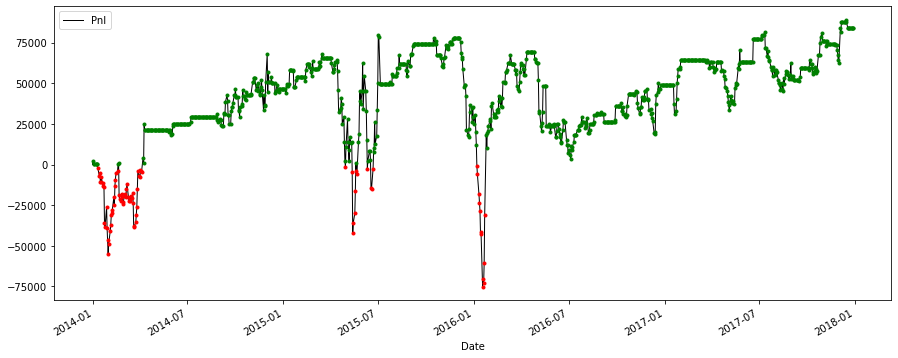

In [67]:
delta_projected_actual_data['Pnl'].plot(color='k', lw=1., legend=True, figsize=(15,6))
plt.plot(delta_projected_actual_data.loc[delta_projected_actual_data.Pnl > 0].index, delta_projected_actual_data.Pnl[delta_projected_actual_data.Pnl > 0], color='g', lw=0, marker='.')
plt.plot(delta_projected_actual_data.loc[delta_projected_actual_data.Pnl < 0].index, delta_projected_actual_data.Pnl[delta_projected_actual_data.Pnl < 0], color='r', lw=0, marker='.')
plt.legend()
plt.show()